In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import random

In [2]:
path = '/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection/results/20241128_081201_w150_l10'
os.chdir(path)
os.getcwd()

'/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection/results/20241128_081201_w150_l10'

In [3]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import utils

In [5]:
df_og = pd.read_csv('../../../../data/time_sorted_table.csv', delimiter=';', index_col=0)
df_og.head()

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510, -5510, -5507, -5507, -5506, -5506, -55...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4
1,4432943,"[526, 526, 1094, 526, 526, 526, 1094, 1094, 10...","[2744, 4148, 4016, 4394, 1566, 1570, 4394, 156...","[-8573, -8573, -8572, -8032, -8032, -8032, -80...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13
2,4432955,"[592, 592, 592, 643, 643, 643, 616, 616, 616, ...","[4394, 1566, 1570, 4394, 1566, 1570, 2674, 156...","[-12291, -12291, -12291, -12291, -12291, -1229...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",14
3,4433021,"[663, 576, 663, 663, 663, 663, 576, 663, 663, ...","[4066, 4066, 3636, 3658, 4078, 4066, 4066, 363...","[-14353, -14351, -14340, -14340, -14330, -1420...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2
4,4433129,"[647, 647, 647, 647, 647, 647, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 4002, 403...","[-227, -227, -226, -225, -225, -225, -224, -22...",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14


In [6]:
with open('NDCGs_all.json', 'r') as file:
    NDCGs_all = json.load(file)

len(NDCGs_all.keys())

797

In [7]:
NDCGs = []
for key, value in NDCGs_all.items():
    pair = dict()
    pair['incident_id'] = key
    pair['ndcg'] = value
    NDCGs.append(pair)

NDCGs[0]

{'incident_id': '4432881', 'ndcg': 0.9917107641653804}

In [8]:
w_incidents = list(NDCGs_all.keys())
no_incidents = []
for id in df_og['incident_id'].to_list():
    if str(id) not in w_incidents:
        no_incidents.append(id)

print(len(no_incidents), len(w_incidents))
no_incidents[:3]

214 797


[4433129, 4433361, 4433509]

In [9]:
df_mse = pd.read_csv('./df_mse.csv', index_col=0)
df_mse.head()

,t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,...,t145,t146,t147,t148,t149,anom_count,incident_id,num,class,mse
0,2744,4004,2852,4110,2854,4396,1132,4140,4148,2708,...,4090,3236,2982,4100,2702,0,4432881,0,normal,45.528598
1,4026,1032,1082,4152,4030,4018,4168,4156,4394,152,...,2744,4004,2852,4110,2854,0,4432881,1,normal,46.252181
2,2742,4410,4406,4068,4408,4412,4066,2744,4026,4148,...,4018,4140,4140,2552,4168,0,4432881,2,normal,46.606699
3,4168,4140,3986,2744,4002,2852,4110,2854,4148,2708,...,4168,4156,2708,2970,4082,0,4432881,3,normal,46.985108
4,4026,4140,4152,4030,4018,4140,4168,4156,2852,2854,...,3236,2982,4066,2708,2708,0,4432881,4,normal,46.674887


In [10]:
with open('../../visualizations/colors.json') as file:
    colors_data = json.load(file)

In [11]:
c_names = [c['name'] for c in colors_data]
c_codes = [c['color'] for c in colors_data]
colors = dict(zip(c_names, c_codes))

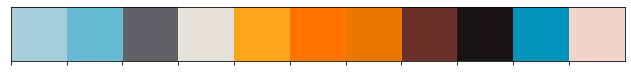

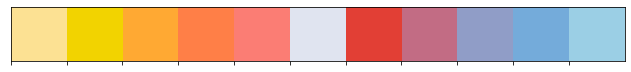

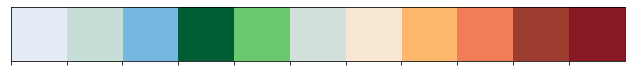

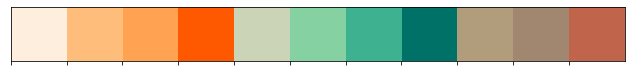

In [12]:
for i in range(0, len(c_names), 11):
    sns.palplot(c_codes[i:i+11])

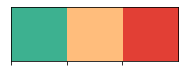

In [13]:
colors_list = [c_codes[39], c_codes[34], c_codes[17]]
cmap = {'normal': colors_list[0],
        'ambiguous': colors_list[1],
        'anomalous': colors_list[2]}
sns.palplot(colors_list)

In [14]:
sns.set_style("darkgrid")
ylabel_args = {'rotation': 0, 'ha': 'right', 'va': 'center', 'ma': 'left'}

Incident: 4455583, NDCG = 0.9219739235233176


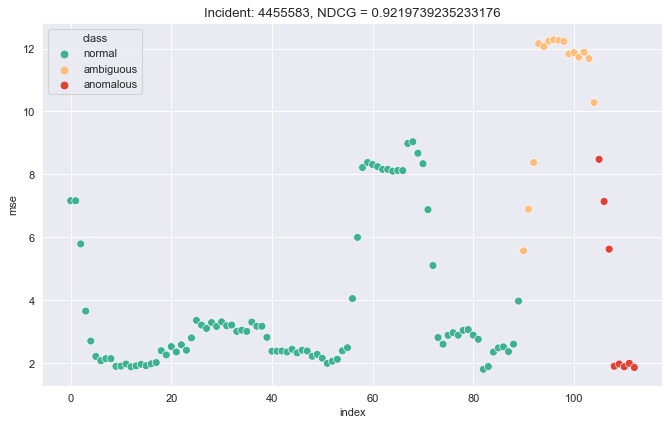

In [33]:
idx = random.choice(w_incidents)
print(f'Incident: {idx}, NDCG = {NDCGs_all[str(idx)]}')

tmp_df = df_mse[df_mse['incident_id'] == int(idx)].reset_index(drop=True)
fig = plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(data=tmp_df.reset_index(), x="index", y="mse", hue="class", palette=cmap, s=50)
plt.title(f'Incident: {idx}, NDCG = {NDCGs_all[str(idx)]}')
plt.show()

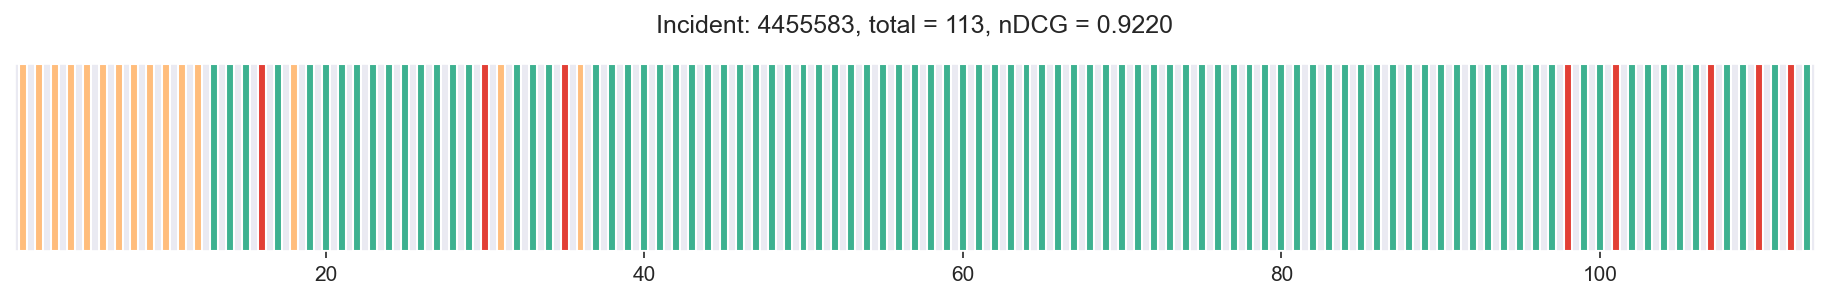

In [34]:
incident_df = df_mse[df_mse['incident_id'] == int(idx)]
ranked_df = incident_df.sort_values(by='mse', ascending=False)
anom_list = incident_df[incident_df['class'] == 'anomalous']['num'].to_list()
ambig_list = incident_df[incident_df['class'] == 'ambiguous']['num'].to_list()
violators = ranked_df['num'].to_list()
anom_pos = list(set(violators) & set(anom_list))
ambig_pos = list(set(violators) & set(ambig_list))

anom_pos_positions = [i+1 for i, x in enumerate(violators) if x in anom_pos]
ambig_pos_positions = [i+1 for i, x in enumerate(violators) if x in ambig_pos]
norm_pos_positions = [i+1 for i, x in enumerate(violators) if x not in anom_pos and x not in ambig_pos]
true_pos_total = incident_df.shape[0]

fig = plt.figure(figsize=(12, 2), dpi=150)
plt.subplots_adjust(bottom=0, left=0, top=1, right=1, hspace=0.5)

sub3 = fig.add_subplot(3, 2, (1, 4))
sub3.bar(anom_pos_positions, np.ones(len(anom_pos_positions)), width=0.5, color=cmap['anomalous'])
sub3.bar(ambig_pos_positions, np.ones(len(ambig_pos_positions)), width=0.5, color=cmap['ambiguous'])
sub3.bar(norm_pos_positions, np.ones(len(norm_pos_positions)), width=0.5, color=cmap['normal'])
sub3.set_title(f'Incident: {idx}, total = {true_pos_total}, nDCG = %.4f' % NDCGs_all[str(idx)], pad=15)
sub3.xaxis.tick_bottom()
sub3.set_ylim([0, 1])
sub3.set_yticks([])

sub3.set_xlim([0.5, true_pos_total+0.5])
plt.show()

In [21]:
err_id = '4606441'

In [25]:
df_og[df_og['incident_id'] == 4459483]

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type
572,4459483,"[1044, 1044, 1044, 1044, 1044, 1044, 1044, 104...","[2744, 4158, 4168, 4140, 3986, 4004, 2852, 411...","[-13238, -13238, -13141, -13131, -13002, -3544...",49.919936,5.378668,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[True, True, True, False, False, False, False,...","[False, False, False, False, False, False, Fal...",14


In [37]:
len(list(df_mse['incident_id'].unique()))

912

In [46]:
l0 = list(df_mse['incident_id'].unique())
l0 = [str(l) for l in l0]
len(l0), len(w_incidents)

(912, 797)

In [47]:
diff = list(set(l0).difference(set(w_incidents)))
len(diff)

115

In [89]:
count = 0
count2 = 0
skips = []
for incident_id in df_mse['incident_id'].unique():
    count += 1
    incident_df = df_mse[df_mse['incident_id'] == incident_id]
    non_norm_count = sum([1 for x in incident_df["class"].to_list() if x != "normal"])
    norm_count = sum([1 for x in incident_df["class"].to_list() if x == "normal"])
    if non_norm_count != 0 and norm_count != 0:
        count2 += 1
    else:
        skips.append(incident_id)

count, count2

(912, 797)

In [90]:
len(skips), skips[:5]

(115, [4433129, 4433927, 4434099, 4434169, 4434357])

In [91]:
df_skip = df_mse[df_mse['incident_id'].isin(skips)]
print(df_skip.shape)
df_skip.head()

(1062, 155)


,t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,...,t145,t146,t147,t148,t149,anom_count,incident_id,num,class,mse
105,4002,4032,4028,2852,4026,4110,4002,4032,4028,2854,...,2708,2708,4028,4026,4020,102,4433129,0,ambiguous,37.210615
106,2852,4026,4110,2572,4016,4092,4094,2742,2854,2708,...,4016,4020,4026,4020,4026,112,4433129,1,ambiguous,36.903462
107,4026,4092,4094,4148,4082,4092,4392,1218,4090,4020,...,4094,3658,4066,4068,3658,122,4433129,2,ambiguous,35.065293
108,4148,4082,4092,4392,1218,4090,4020,4030,4020,4026,...,4068,3658,4066,4068,3658,125,4433129,3,ambiguous,34.738876
550,2708,2744,4026,4020,4026,4016,4020,2852,3634,2854,...,4120,4068,4068,3658,3636,25,4433927,0,ambiguous,40.220589


In [92]:
df_skip['incident_id'].unique().shape

(115,)

Incident: 4443491


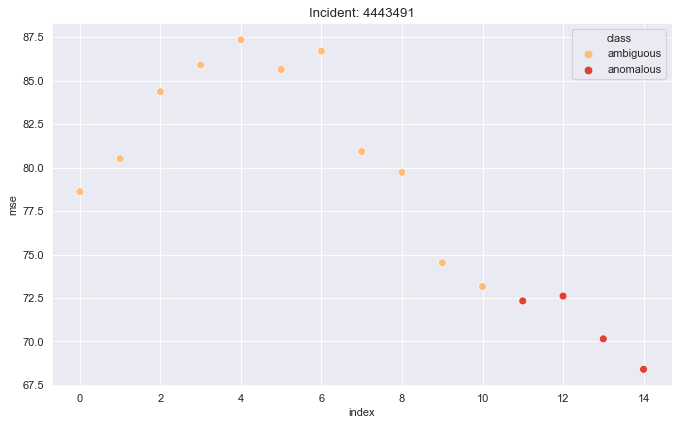

In [126]:
idx = random.choice(skips)
print(f'Incident: {idx}')

tmp_df = df_skip[df_skip['incident_id'] == int(idx)].reset_index(drop=True)
fig = plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(data=tmp_df.reset_index(), x="index", y="mse", hue="class", palette=cmap, s=50)
plt.title(f'Incident: {idx}')
plt.show()

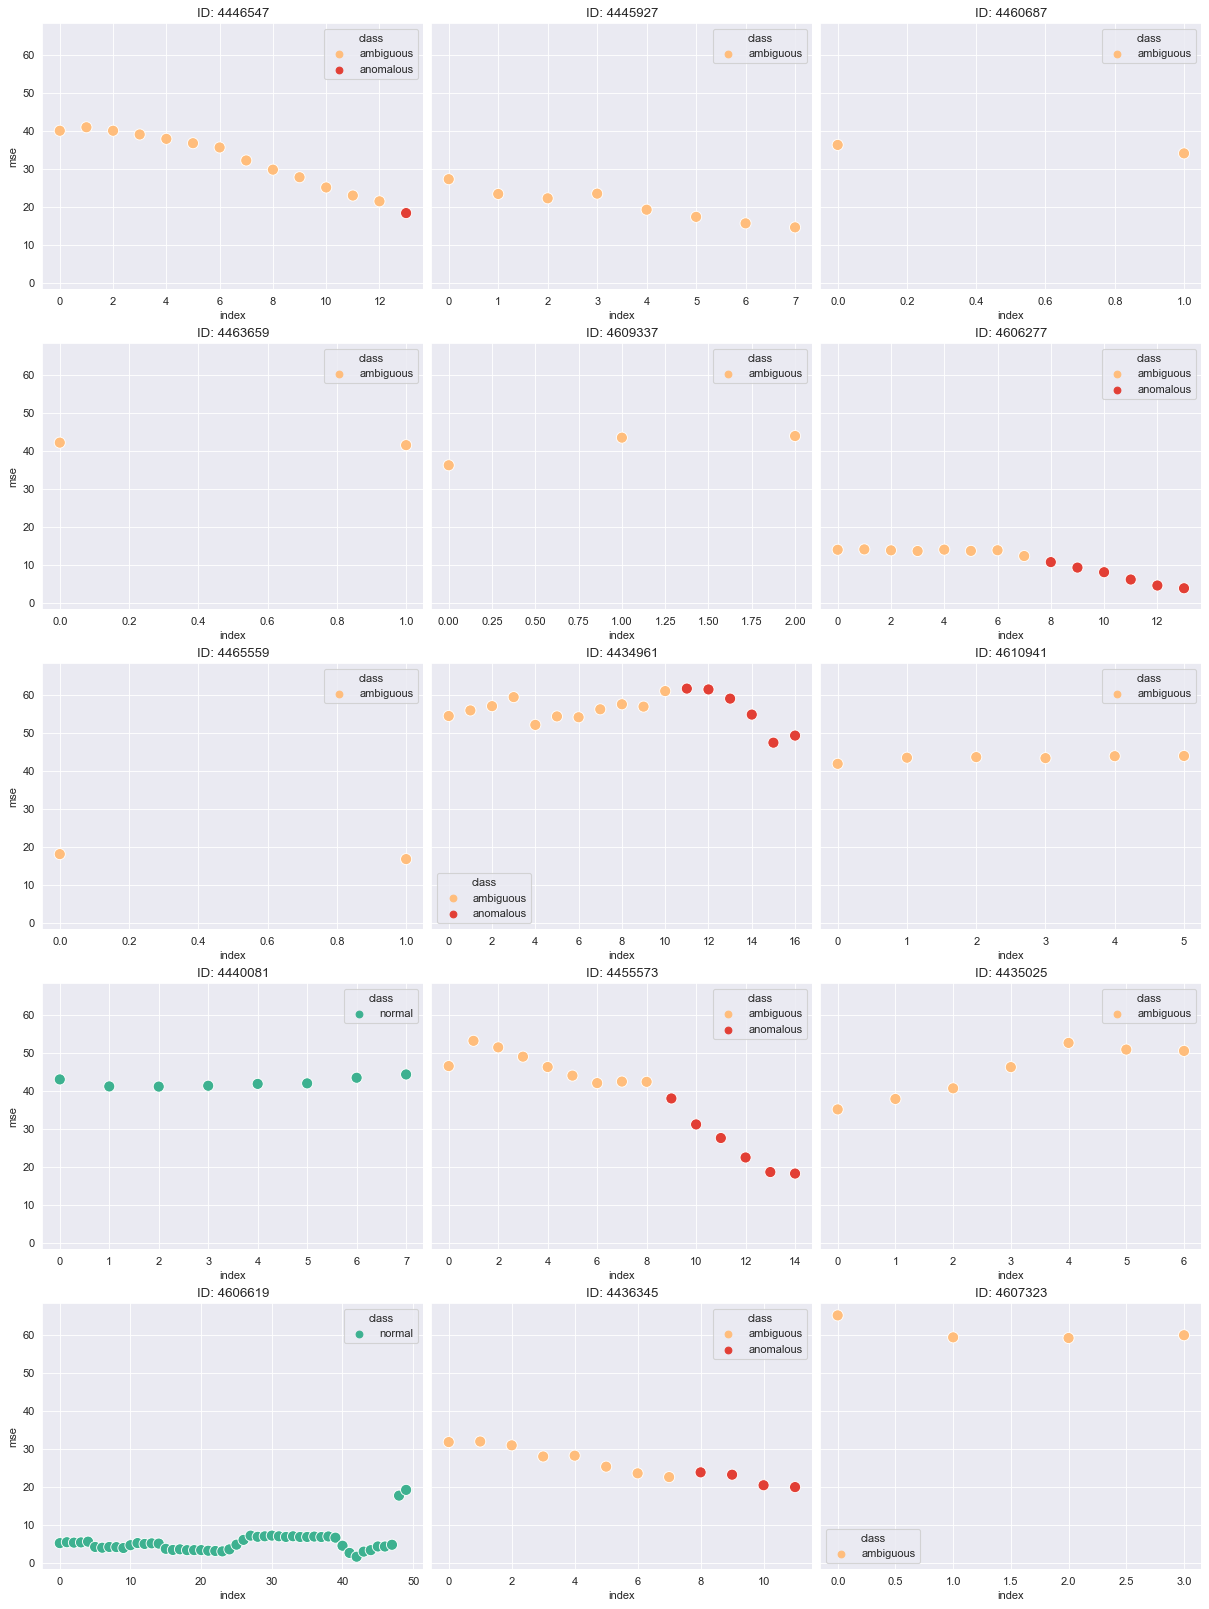

In [147]:
nrows = 5
ncols = 3
dim_x = 5
dim_y = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(dim_x*ncols, dim_y*nrows),
                         sharey=True, dpi=80, constrained_layout=True)

indices = random.sample(skips, 15)
for i in range(nrows):
    for j in range(ncols):
        idx = i * ncols + j
        tmp_df = df_skip[df_skip['incident_id'] == indices[idx]].reset_index(drop=True)
        sns.scatterplot(data=tmp_df.reset_index(), x="index", y="mse", hue="class",
                        palette=cmap, s=100, ax=axes[i][j])
        axes[i][j].set_title(f'ID: {indices[idx]}')

plt.show()